# Violinos

## Objetivo: Apresentar a ideia de gráficos de violinos e explicá-los.

In [1]:
import pandas as pd

df = pd.read_csv('materiais de aula/survey_results_public.csv', index_col='ResponseId')
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### A relação entre boxplot e histogramas

É possível ver uma relação direta entre um boxplot e um histograma de um conjunto de dados. Afinal, ambos são formas de representar uma distribuição de dados.

Essa relação fica mais clara se plotarmos os dados um abaixo do outro (aproveitando também para plotar as linhas dos quantis e da média):

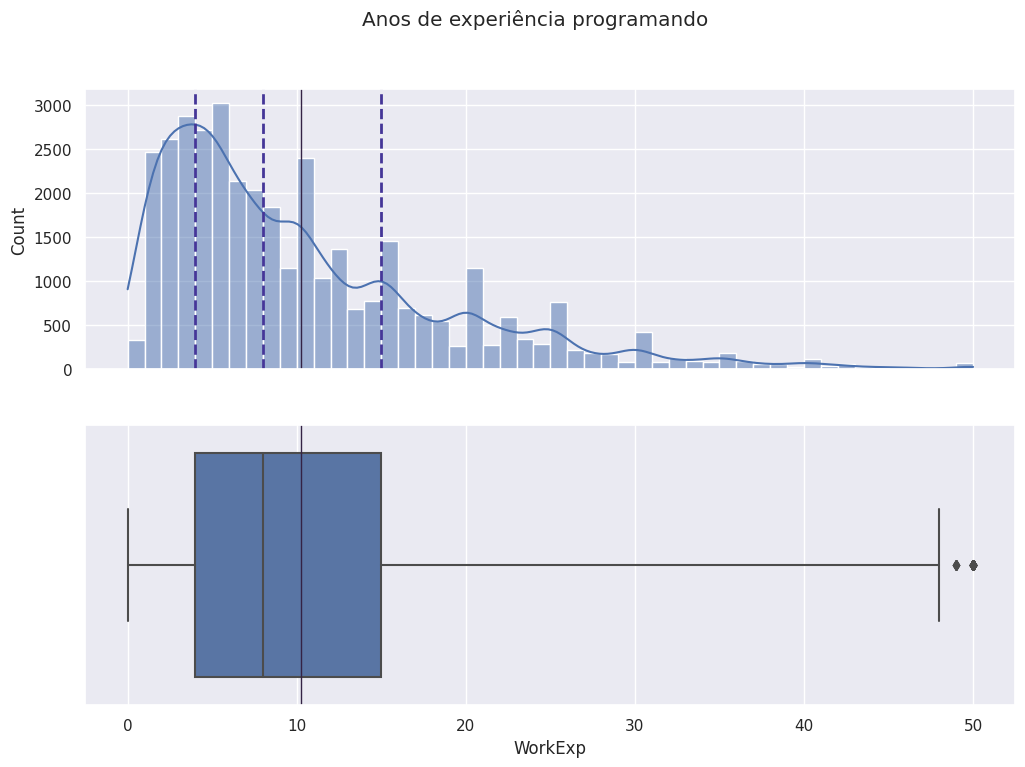

In [7]:
quantile_args = {
    'linewidth': 2,
    'color': '#453698',
    'linestyle': '--',
}
mean_args = {
    'linewidth': 1,
    'color': '#342345',
    'linestyle': '-',
}

fig, (ax_cima, ax_baixo) = plt.subplots(figsize=(12, 8), nrows=2, sharex=True)

sns.histplot(data=df, ax=ax_cima, x='WorkExp', binwidth=1, kde=True)
for q in [0.25, 0.5, 0.75]:
    ax_cima.axvline(df['WorkExp'].quantile(q), **quantile_args)
ax_cima.axvline(df['WorkExp'].mean(), **mean_args)

sns.boxplot(data=df, ax=ax_baixo, x='WorkExp', whis=3.0)
ax_baixo.axvline(df['WorkExp'].mean(), **mean_args)

fig.suptitle('Anos de experiência programando')

plt.show()

Podemos reunir as duas visualizações (forma da distribuição + posição dos quantis) em um mesmo gráfico, se usando um gráfico de violino!

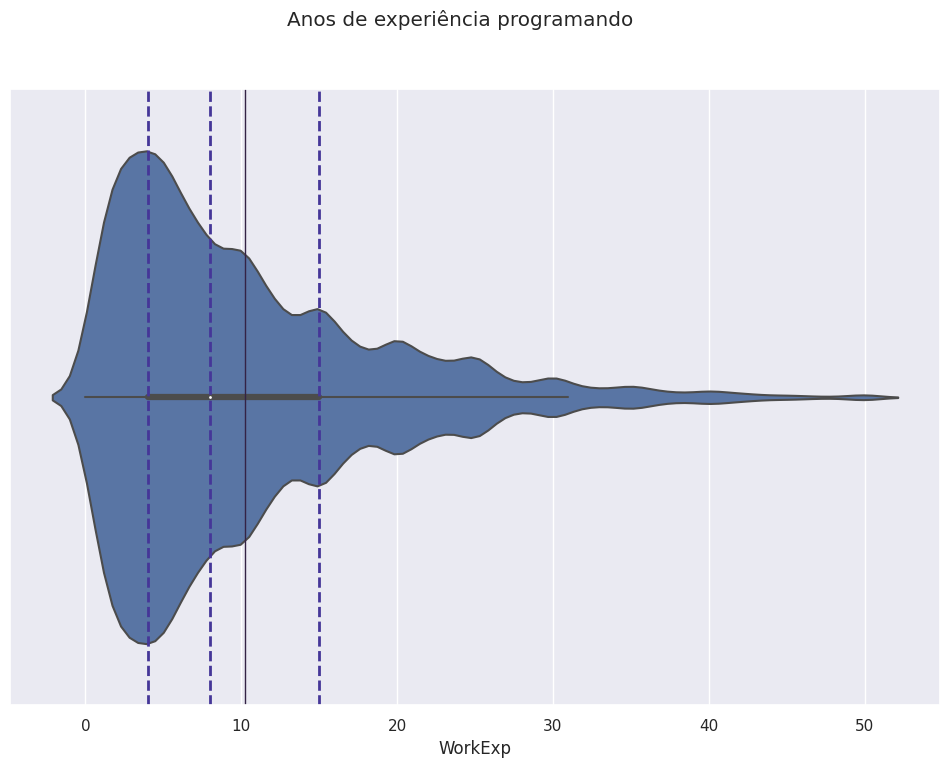

In [10]:
quantile_args = {
    'linewidth': 2,
    'color': '#453698',
    'linestyle': '--',
}
mean_args = {
    'linewidth': 1,
    'color': '#342345',
    'linestyle': '-',
}

fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=df, ax=ax, x='WorkExp')
for q in [0.25, 0.5, 0.75]:
    ax.axvline(df['WorkExp'].quantile(q), **quantile_args)
ax.axvline(df['WorkExp'].mean(), **mean_args)

fig.suptitle('Anos de experiência programando')

plt.show()

Como nos histogramas, também é possível comparar diferentes distribuições com violinplots. Nesse caso, cada distribuição se torna um violino:

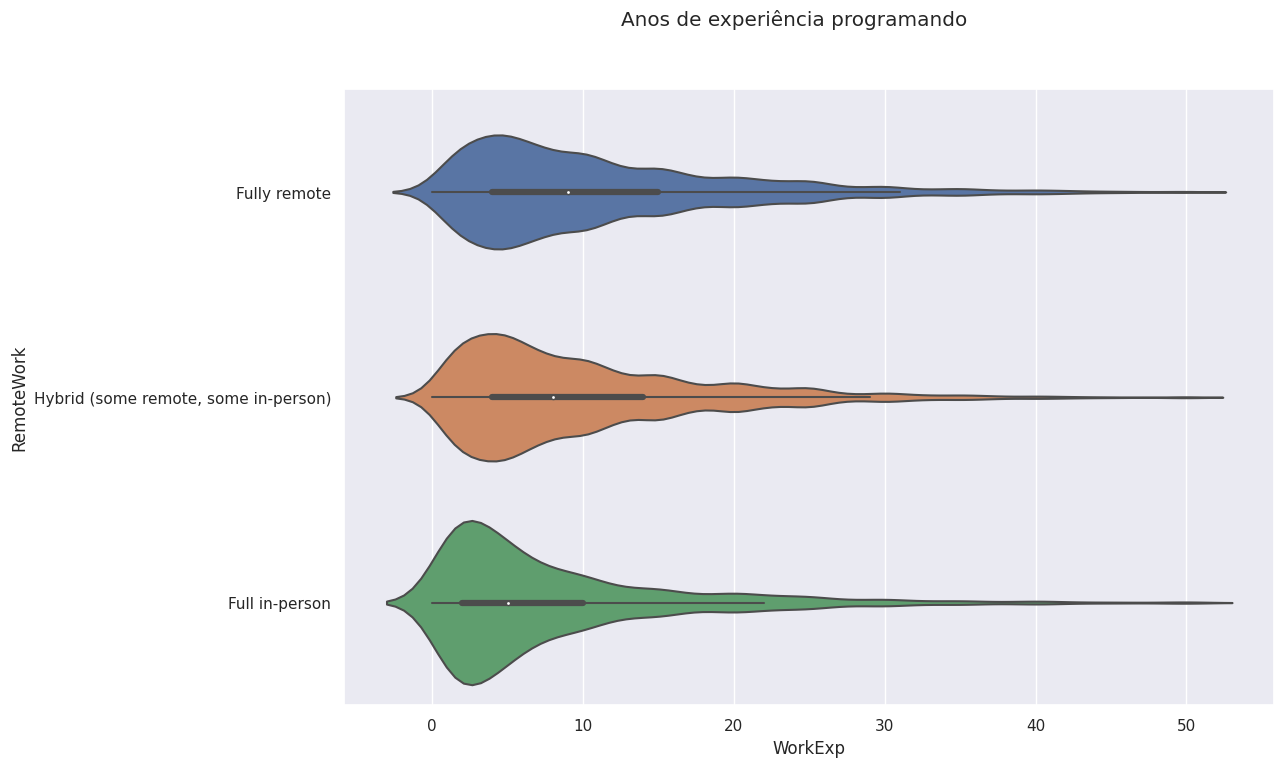

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=df, ax=ax, x='WorkExp', y='RemoteWork')
fig.suptitle('Anos de experiência programando')

plt.show()

A concentração dos entrevistados que trabalham presencialmente no começo do gráfico fica mais clara com essa separação!

### Múltiplas categorias
Se tivermos uma variável categórica com 2 valores possíveis, cada metade do violino pode representar uma das alternativas.

Vamos criar uma coluna com valor verdadeiro/falso que represente o entrevistado já ter trabalhado com a linguagem Python.

A coluna `LanguageHaveWorkedWith` representa todas as linguagens com que os entrevistados já trabalharam:

In [12]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;Java

Como vemos, essa coluna apresenta cada linguagem separada por ponto-e-vírgula (já que havia a possibilidade de escolher quantas linguagens fosse necessário). Vamos criar a coluna apenas checando se o string `"Python"` está dentro do valor de cada linha:

In [13]:
df['WorkedWithPython'] = df['LanguageHaveWorkedWith'].str.contains('Python')
df['WorkedWithPython'].value_counts(normalize=True, dropna=False).apply(lambda p: f'{100 * p:.2f}%')  # Confirmando que deu certo

WorkedWithPython
False    50.25%
True     46.62%
NaN       3.13%
Name: proportion, dtype: object

Agora vamos plotar o violino, adicionando esta informação. Para ficar diferente do plot anterior, vamos também inverter os eixos X e Y:

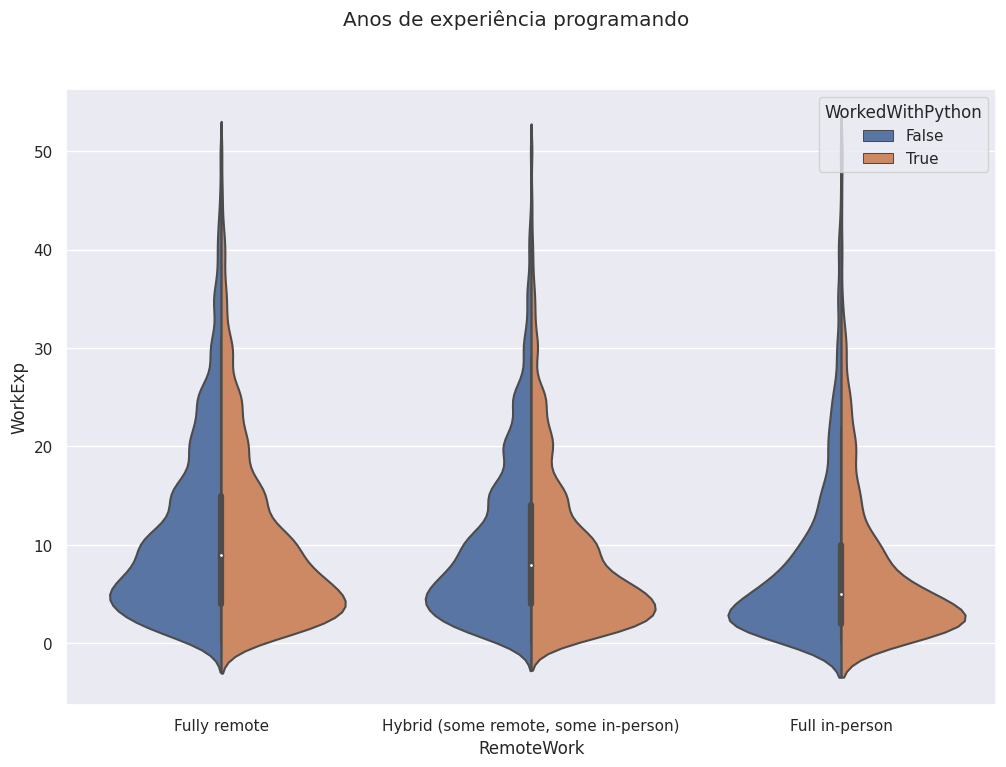

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.violinplot(data=df, ax=ax, y='WorkExp', x='RemoteWork', hue='WorkedWithPython', split=True)
fig.suptitle('Anos de experiência programando')

plt.show()

Parece que, em todos os regimes de trabalho, as pessoas que já trabalharam com Python alguma vez na vida são ligeiramente mais jovens.

Faz sentido: há 15 anos, Python não era uma linguagem tão difundida e madura quanto é hoje. Portanto, é natural que muitos desenvolvedores dos anos 2000 tenham construído sua carreira com alguma outra linguagem de programação.

Podemos inclusive confirmar isto com código:

In [17]:
df.groupby(['RemoteWork', 'WorkedWithPython'])['WorkExp'].agg(['mean', 'median'])

mean  median
RemoteWork                           WorkedWithPython                   
Full in-person                       False              8.336978     5.0
                                     True               7.692831     5.0
Fully remote                         False             11.605500     9.0
                                     True              10.572687     8.0
Hybrid (some remote, some in-person) False             10.617223     8.0
                                     True               9.321195     7.0

### Alterando gráficos de violinos

Como qualquer outro gráfico da biblioteca `seaborn`, os violinplots são altamente customizáveis. Podemos, por exemplo, usar o argumento `bw` para controlar a suavidade da curvatura do violino:

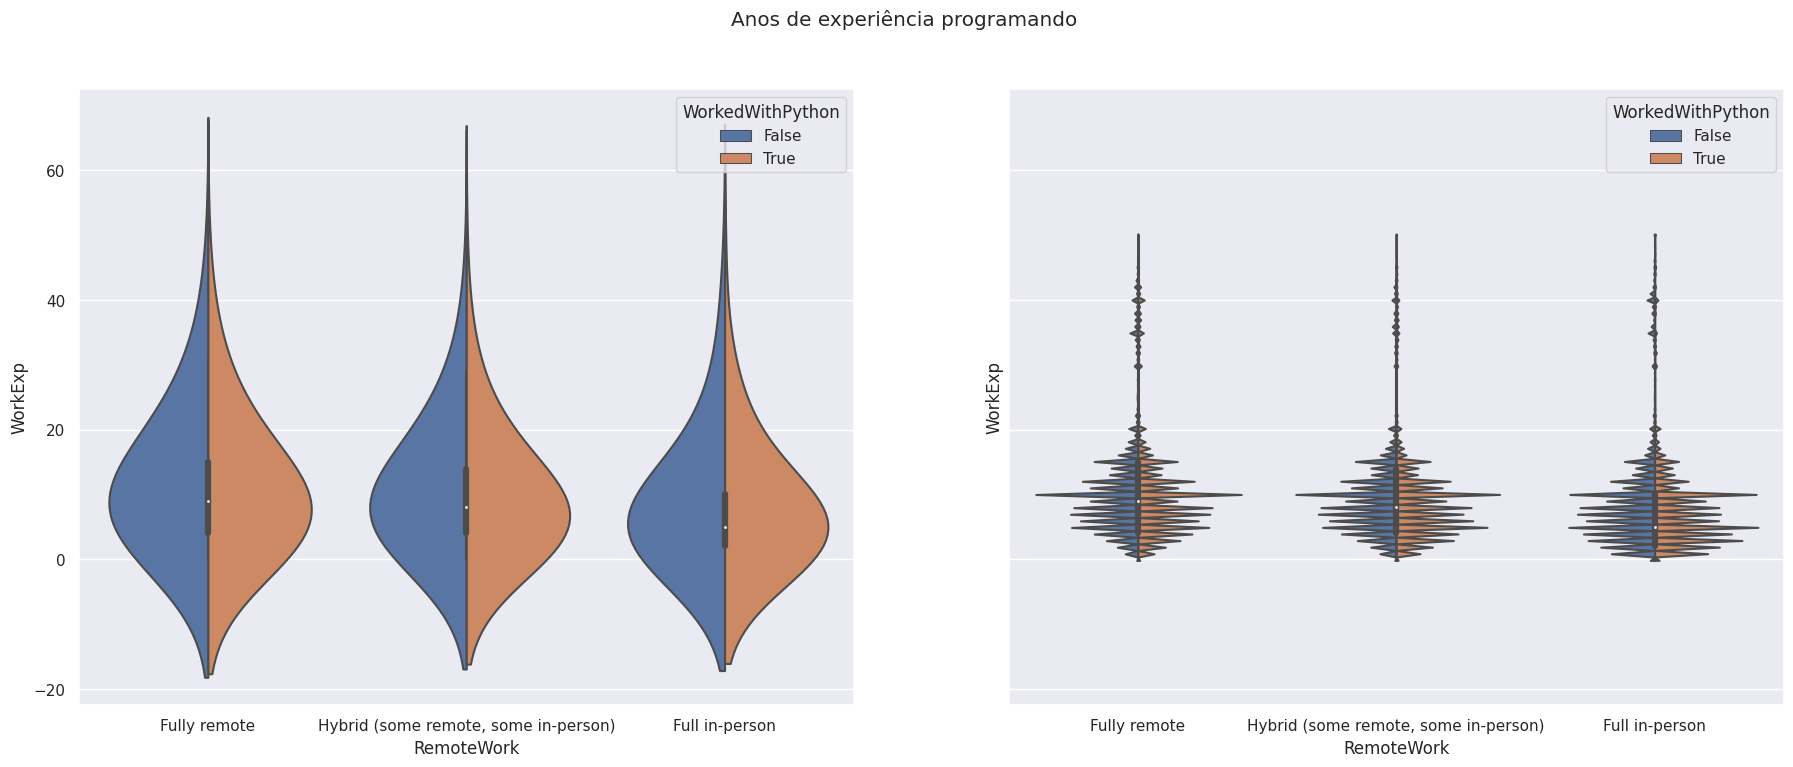

In [18]:
fig, (ax_esq, ax_dir) = plt.subplots(figsize=(22, 8), ncols=2, sharey=True)

sns.violinplot(data=df, ax=ax_esq, y='WorkExp', x='RemoteWork', hue='WorkedWithPython', split=True, bw=1)  # muito suave
sns.violinplot(data=df, ax=ax_dir, y='WorkExp', x='RemoteWork', hue='WorkedWithPython', split=True, bw=0.01)  # pouco suave
fig.suptitle('Anos de experiência programando')

plt.show()